In [1]:
%matplotlib inline

from NewsFlow import *
from VisualTools import *

%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

# Basic use

The `NewsFlow` can be simulated in many different ways using various input parameters. Nevertheless, at the very least, its basic use requires specifying the following input parameters:
- population layer $\mathcal{G}_R = (\mathcal{R}, E_R)$ in the form of an (unweighted undirected) `igraph.Graph` graph,
- the initial number $R^F(0) \in [1, R-1]$ of consumers of false news in the form of an `int` variable `F0`,
- the rate $\eta$ of per-capita news-alignment events (these rewire the inter-layer coupling) in the form of a `double` variable `eta`,
- the basic spreading rate $\lambda^F$ regulating edge-balancing events towards the false state in the form of a `double` variable `lambda_F`.

For example:

In [2]:
g = ig.Graph.Barabasi(n=1000, m=20, power=-2.5) # generates a Barabási-Albert graph on 1000 vertices
time_range, list_polarised, list_rhoF, list_FT_edges = newsFlow(g=g, F0=500, eta=10, lambda_F=0.5)

Variance in the number of FT edges/polarised individuals is too low.
Elapsed time: 0.053 s


Notice that the execution terminated at $t_n$ due to the sample variance in either the number of unbalanced (active) edges $\lvert E^{FT}(t_n) \rvert$ or the number of polarised individuals $P(t_n)$ over the sliding window of length `window_size` dropping below the permitted tolerance `tol`.

One could instead specify an upper limit on the simulation time by providing an `int` variable `t_max`, e.g.,

In [3]:
time_range, list_polarised, list_rhoF, list_FT_edges = newsFlow(g=g, F0=500, eta=10, lambda_F=0.5,
                                                                t_max=100)

Max time step exceeded.
Elapsed time: 2.805 s


Or, one could use *both* termination conditions by feeding in the upper limit on the simulation time `t_max` as well as the arguments `window_size` and/or `tol` customising the computation of the sliding-window variances (note that one can always tweak either or both of these parameters).

In [4]:
time_range, list_polarised, list_rhoF, list_FT_edges = newsFlow(g=g, F0=500, eta=10, lambda_F=0.5, 
                                                                t_max=100, window_size=200, tol=0.0001)

Variance in the number of FT edges/polarised individuals is too low.
Elapsed time: 0.044 s


However, in order to make sense of the simulation outcomes, one might want to make use of the visualisation tools provided in the script `VisualTools`.

In the [following section](#sfreq0) of the tutorial we focus solely on the default value of the sampling frequency `sfreq`, i.e., `sfreq == 0`. This comes in handy when one is interested in the detailed time evolution of the system at the macro level.

Next, we take a peek at the case of `sfreq < 0`. This choice is especially helpful when only the final simulation state (at the macro level) is required. [Section](#sfreql0) provides related visual aids.

Finally, the [last section](#sfreqg0) is dedicated to examples where the particular choice of `sfreq > 0` matters even more and at last justifies its name. Here, one can find a selection of functions which illustrate the time evolution (with a sampling frequency of `sfreq`) at the micro scale, that is, at the level of individual news providers and individual news consumers.


## Default value of the sampling frequency `sfreq`: `sfreq == 0`
<a id='sfreq0'></a>

Variance in the number of FT edges/polarised individuals is too low.
Elapsed time: 0.24 s


<Figure size 432x288 with 0 Axes>

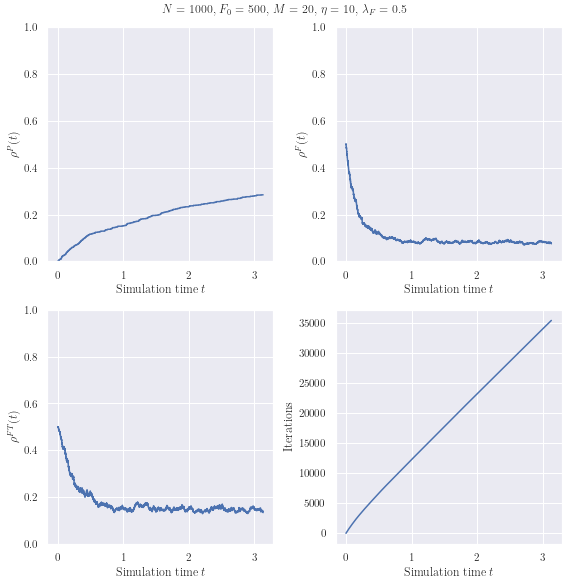

In [5]:
_ = plot_newsFlow(N=1000, F0=500, eta=10, lambda_F=0.5)

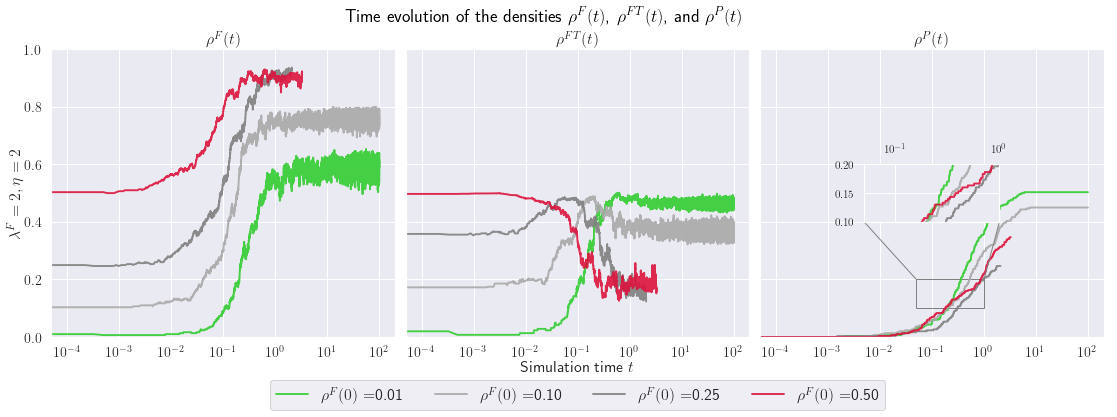

In [6]:
data = time_evolution_F0(N=300, list_F0=[3, 30, 75, 150], lambda_F=2, eta=20, t_max=100)

colours = ['limegreen', 'darkgray', 'gray', 'crimson']

draw_time_evolution_F0(data=data, colours=colours, inset_lims=[0.05, 1, 0.1, 0.2], inset_width=2)

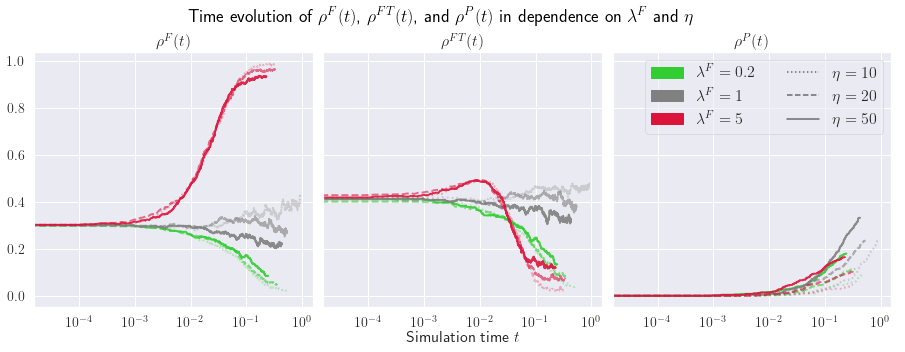

In [7]:
data = time_evolution_lambda_F_eta(N=500, F0=150, list_lambdaF=[0.2, 1, 5], list_eta=[10, 20, 50])

legend_elements = [Patch(color='limegreen', label=r'$\lambda^F = 0.2$'),
                   Patch(color='gray', label=r'$\lambda^F = 1$'),
                   Patch(color='crimson', label=r'$\lambda^F = 5$'),
                   Line2D([], [], color='dimgray', label='$\eta = 10$', linestyle='dotted',
                          markerfacecolor='dimgray'),
                   Line2D([], [], color='dimgray', label='$\eta = 20$', linestyle='dashed',
                          markerfacecolor='dimgray'),
                   Line2D([], [], color='dimgray', label='$\eta = 50$', linestyle='solid',
                          markerfacecolor='dimgray')]

colours = {0.2: 'limegreen', 1: 'gray', 5: 'crimson'}
linestyles = {10: 'dotted', 20: 'dashed', 50: 'solid'}
alphas = {10: 0.3, 20: 0.6, 50: 0.9}

draw_time_evolution_lambda_F_eta(data=data, colours=colours, linestyles=linestyles, alphas=alphas,
                                 legend_elements=legend_elements)

## Sampling frequency `sfreq < 0`
<a id='sfreql0'></a>

In [8]:
final_polarised, final_rhoF, final_FT_edges = rho_heatmaps(N=300, F0=150, 
                                                           lambdaF_list=[0.25, 0.5, 1, 2, 4],
                                                           eta_list=[10, 20, 30, 40, 50],
                                                           rep=10, tol=0.02)

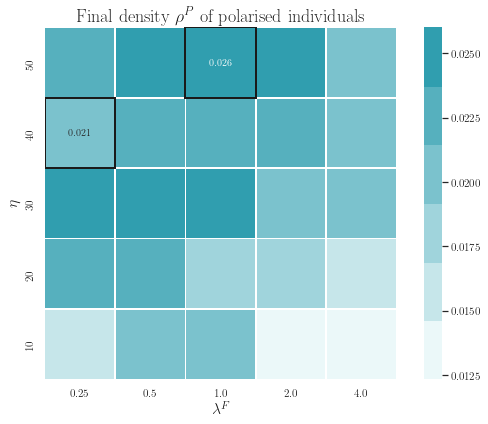

In [9]:
draw_heatmap(data=final_polarised, title=r'Final density $\rho^P$ of polarised individuals',
             cmap=sns.light_palette((210, 90, 60), input="husl"), markCells=[[1,0], [0,2]])

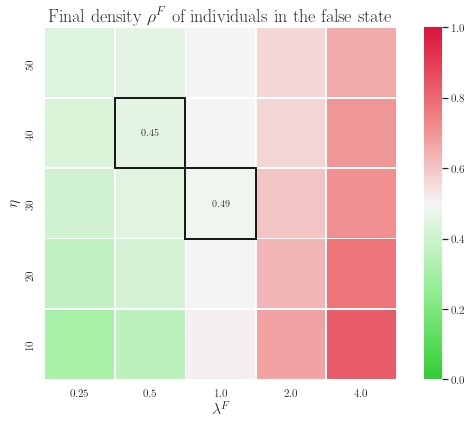

In [10]:
cmap = LinearSegmentedColormap.from_list(name='rhoF', 
            colors=['limegreen', 'lightgreen', 'whitesmoke', 'lightcoral', 'crimson'], N=300)

draw_heatmap(data=final_rhoF, title=r'Final density $\rho^F$ of individuals in the false state',
             cmap=cmap, markCells=[[1,1], [2,2]], vmin=0.00, vmax=1.00, center=0.50)

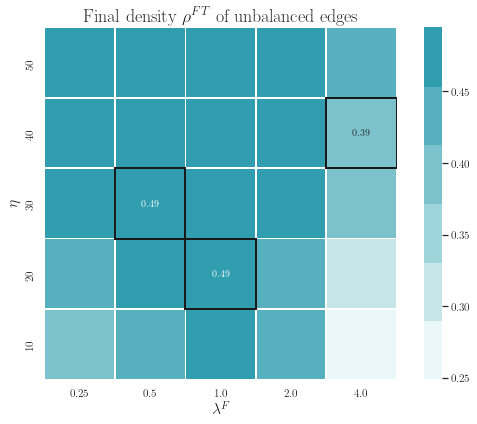

In [11]:
draw_heatmap(data=final_FT_edges, title=r'Final density $\rho^{FT}$ of unbalanced edges',
             cmap=sns.light_palette((210, 90, 60), input="husl"), markCells=[[3,2], [2,1], [1,4]])

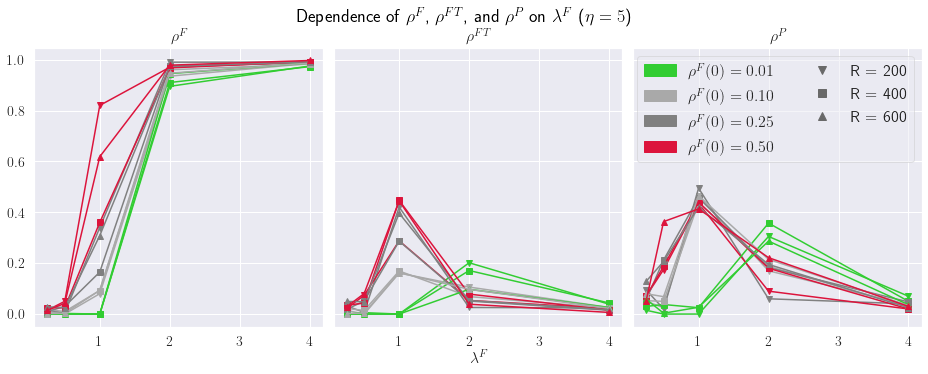

In [12]:
data = rho_lambdaF(list_N=[200, 400, 600], list_rhoF0=[0.01, 0.10, 0.25, 0.5], rep=1,
                   list_lambdaF=[0.25, 0.5, 1, 2, 4], eta=5, t_max=100)

colours = {0.01: 'limegreen', 0.1: 'darkgray', 0.25: 'gray', 0.5: 'crimson'}
markers = {200: 'v', 400: 's', 600: '^'}

legend_elements = [Patch(color='limegreen', label=r'$\rho^F(0) = 0.01$'),
                   Patch(color='darkgray', label=r'$\rho^F(0) = 0.10$'),
                   Patch(color='gray', label=r'$\rho^F(0) = 0.25$'),
                   Patch(color='crimson', label=r'$\rho^F(0) = 0.50$'),
                   Line2D([], [], marker='v', color='dimgray', label='R = 200', linestyle='None',
                          markerfacecolor='dimgray', markersize=8),
                   Line2D([], [], marker='s', color='dimgray', label='R = 400', linestyle='None',
                          markerfacecolor='dimgray', markersize=8),
                   Line2D([], [], marker='^', color='dimgray', label='R = 600', linestyle='None',
                          markerfacecolor='dimgray', markersize=8)]

plot_densities_lambdaF(data=data, colours=colours, markers=markers, legend_elements=legend_elements)

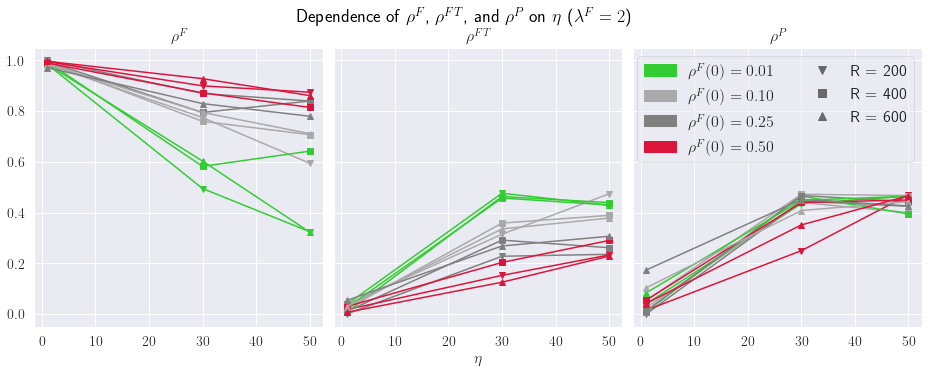

In [13]:
data = rho_eta(list_N=[200, 400, 600], list_rhoF0=[0.01, 0.10, 0.25, 0.5], rep=1,
               list_eta=[1, 30, 50], lambda_F=2, t_max=50)

plot_densities_eta(data=data, colours=colours, markers=markers, legend_elements=legend_elements)

## Sampling frequency `sfreq > 0`
<a id='sfreqg0'></a>

In [14]:
data = get_media_repertoire(N=500, lambda_F=1, eta=50, sfreq=10, t_max=50)

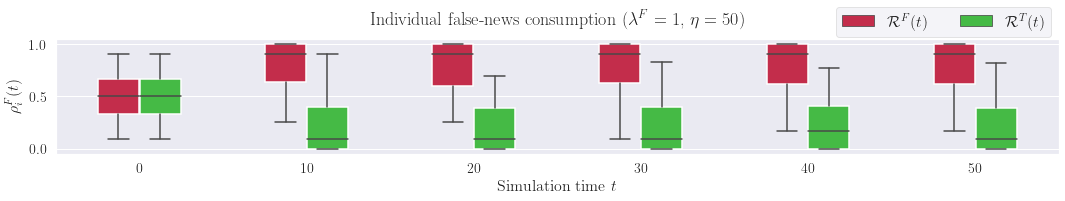

In [15]:
media_repertoire(data=data)

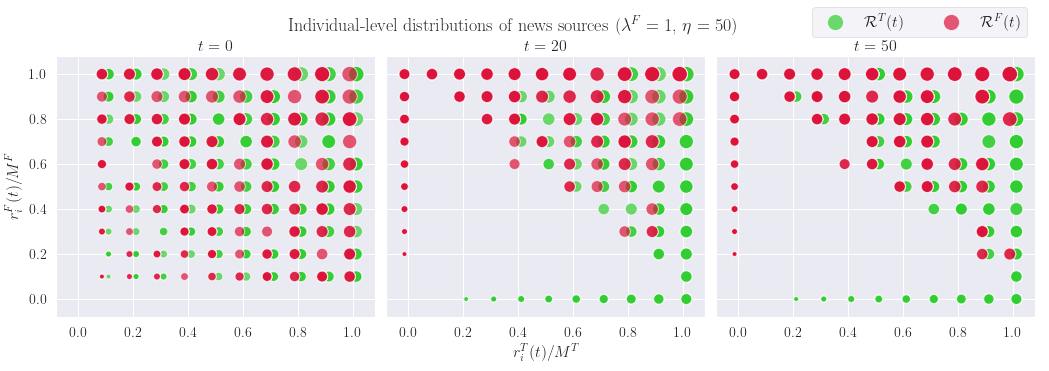

In [16]:
public_scatter(data=data)

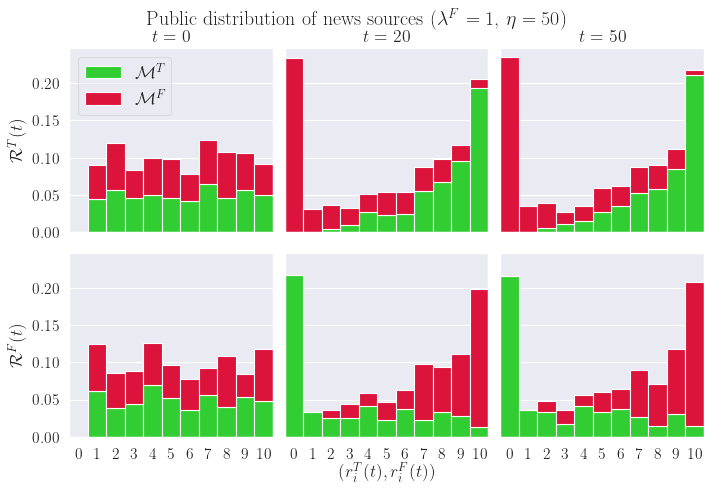

In [17]:
subscription(data=data)

In [18]:
data = get_media_subscriptions(N=500, lambda_F=1, eta=50, sfreq=10, t_max=100)

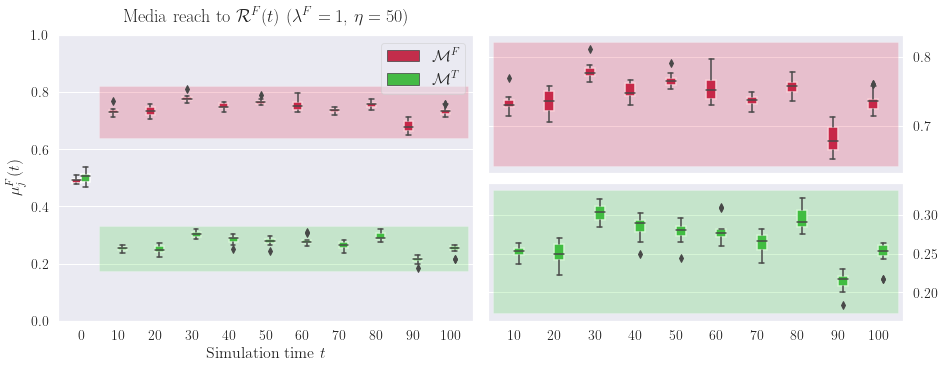

In [19]:
media_subscriptions(data=data)

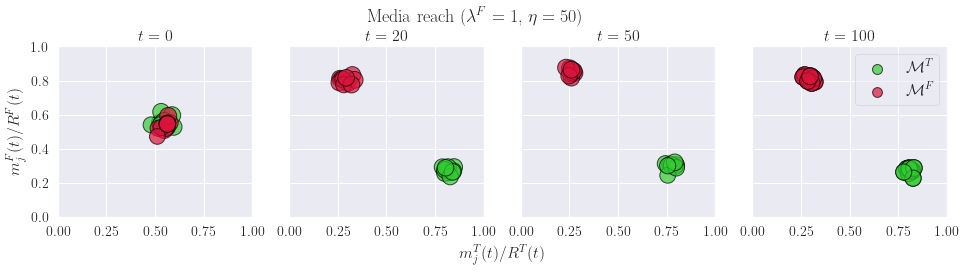

In [20]:
media_scatter(data=data)

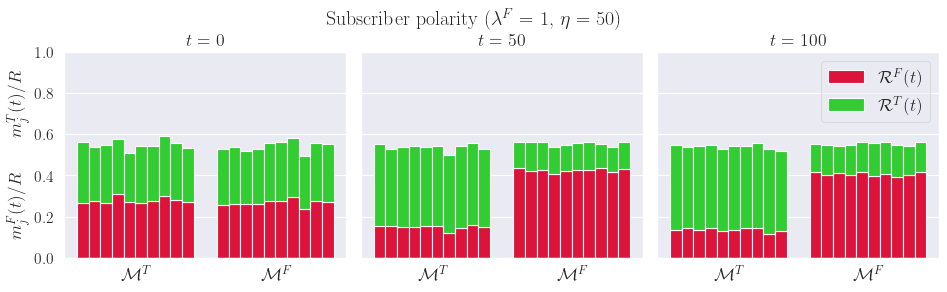

In [21]:
readership(data=data)